In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("="*60)
print("K-NEAREST NEIGHBORS (KNN) CLASSIFICATION")
print("="*60)

K-NEAREST NEIGHBORS (KNN) CLASSIFICATION


In [2]:
print("\n1. LOADING AND EXPLORING THE DATASET")
print("-" * 40)

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create DataFrame for better visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print(f"Dataset shape: {df.shape}")
print(f"Features: {list(iris.feature_names)}")
print(f"Target classes: {list(iris.target_names)}")
print(f"\nFirst 5 rows:")
print(df.head())

print(f"\nDataset info:")
print(f"Total samples: {len(df)}")
print(f"Features: {X.shape[1]}")
print(f"Classes: {len(np.unique(y))}")
print(f"Class distribution:")
print(df['species'].value_counts())



1. LOADING AND EXPLORING THE DATASET
----------------------------------------
Dataset shape: (150, 6)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

Dataset info:
Total samples: 150
Features: 4
Classes: 3
Class distribution:
species
setosa        50
versicolor 

In [3]:
print("\n\n2. DATA PREPROCESSING AND NORMALIZATION")
print("-" * 40)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Normalize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nBefore normalization:")
print(f"Training set mean: {X_train.mean(axis=0)}")
print(f"Training set std: {X_train.std(axis=0)}")

print(f"\nAfter normalization:")
print(f"Training set mean: {X_train_scaled.mean(axis=0)}")
print(f"Training set std: {X_train_scaled.std(axis=0)}")



2. DATA PREPROCESSING AND NORMALIZATION
----------------------------------------
Training set size: 105
Test set size: 45

Before normalization:
Training set mean: [5.87333333 3.0552381  3.7847619  1.20571429]
Training set std: [0.85882164 0.45502087 1.77553646 0.77383751]

After normalization:
Training set mean: [ 2.38327876e-15 -1.12145742e-15 -1.37456184e-16 -6.97854473e-17]
Training set std: [1. 1. 1. 1.]


In [4]:
print("\n\n3. EXPERIMENTING WITH DIFFERENT K VALUES")
print("-" * 40)

# Test different K values
k_values = range(1, 21)
train_accuracies = []
test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    train_pred = knn.predict(X_train_scaled)
    test_pred = knn.predict(X_test_scaled)

    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"K={k:2d}: Train Accuracy={train_acc:.4f}, Test Accuracy={test_acc:.4f}")

# Find optimal K
optimal_k = k_values[np.argmax(test_accuracies)]
print(f"\nOptimal K value: {optimal_k}")
print(f"Best test accuracy: {max(test_accuracies):.4f}")



3. EXPERIMENTING WITH DIFFERENT K VALUES
----------------------------------------
K= 1: Train Accuracy=1.0000, Test Accuracy=0.9333
K= 2: Train Accuracy=0.9810, Test Accuracy=0.8889
K= 3: Train Accuracy=0.9714, Test Accuracy=0.9111
K= 4: Train Accuracy=0.9619, Test Accuracy=0.9111
K= 5: Train Accuracy=0.9810, Test Accuracy=0.9111
K= 6: Train Accuracy=0.9619, Test Accuracy=0.9111
K= 7: Train Accuracy=0.9810, Test Accuracy=0.9333
K= 8: Train Accuracy=0.9810, Test Accuracy=0.9111
K= 9: Train Accuracy=0.9714, Test Accuracy=0.9556
K=10: Train Accuracy=0.9810, Test Accuracy=0.9333
K=11: Train Accuracy=0.9714, Test Accuracy=0.9556
K=12: Train Accuracy=0.9810, Test Accuracy=0.9556
K=13: Train Accuracy=0.9714, Test Accuracy=0.9333
K=14: Train Accuracy=0.9810, Test Accuracy=0.9556
K=15: Train Accuracy=0.9810, Test Accuracy=0.9333
K=16: Train Accuracy=0.9810, Test Accuracy=0.9111
K=17: Train Accuracy=0.9619, Test Accuracy=0.9111
K=18: Train Accuracy=0.9619, Test Accuracy=0.9111
K=19: Train Accu

In [5]:
print("\n\n4. TRAINING FINAL MODEL")
print("-" * 40)

# Train with optimal K
final_knn = KNeighborsClassifier(n_neighbors=optimal_k)
final_knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = final_knn.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Final model accuracy: {accuracy:.4f}")



4. TRAINING FINAL MODEL
----------------------------------------
Final model accuracy: 0.9556


In [6]:
print("\n\n5. DETAILED MODEL EVALUATION")
print("-" * 40)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))



5. DETAILED MODEL EVALUATION
----------------------------------------
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45





6. CREATING VISUALIZATIONS
----------------------------------------


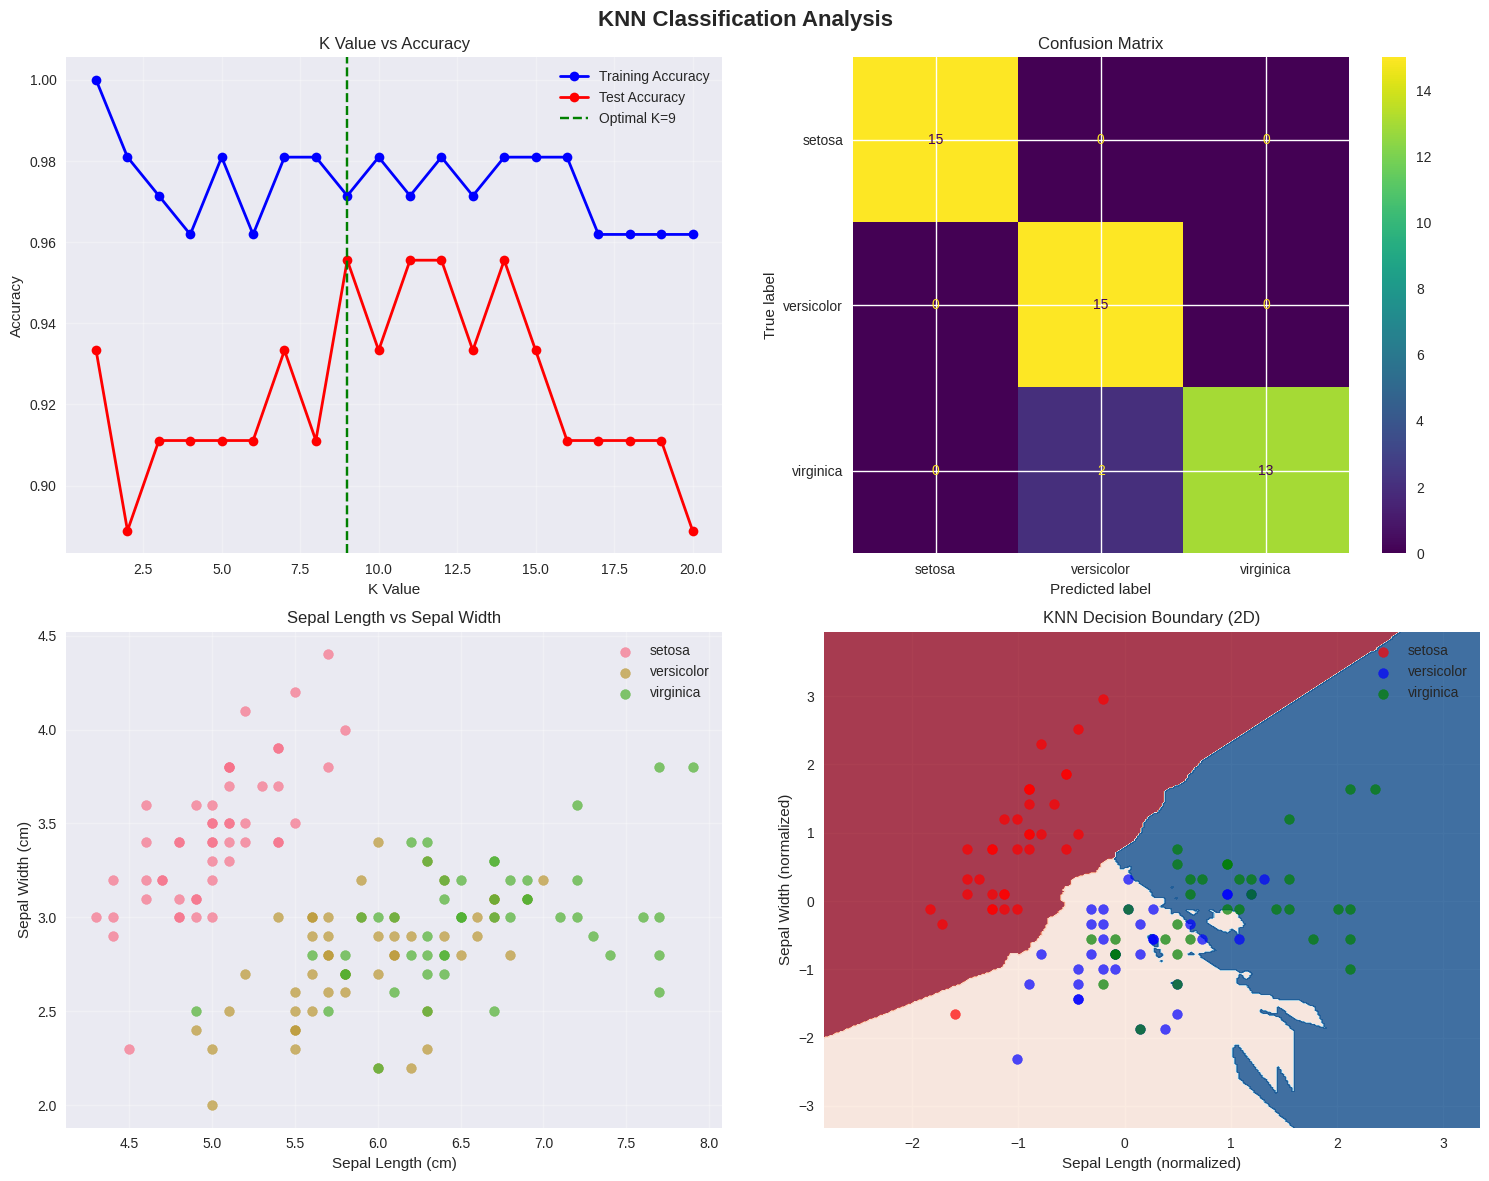



7. PERFORMANCE SUMMARY
----------------------------------------
📊 Dataset: Iris Dataset (150 samples)
🎯 Task: Multi-class classification (3 classes)
🔧 Algorithm: K-Nearest Neighbors
📈 Optimal K: 9
🎯 Final Accuracy: 0.9556 (95.56%)
🔄 Cross-validation: Used train-test split with stratification
⚡ Normalization: StandardScaler applied


In [7]:
print("\n\n6. CREATING VISUALIZATIONS")
print("-" * 40)

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('KNN Classification Analysis', fontsize=16, fontweight='bold')

# Plot 1: K value vs Accuracy
axes[0, 0].plot(k_values, train_accuracies, 'bo-', label='Training Accuracy', linewidth=2)
axes[0, 0].plot(k_values, test_accuracies, 'ro-', label='Test Accuracy', linewidth=2)
axes[0, 0].axvline(x=optimal_k, color='green', linestyle='--', label=f'Optimal K={optimal_k}')
axes[0, 0].set_xlabel('K Value')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('K Value vs Accuracy')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names).plot(ax=axes[0, 1])
axes[0, 1].set_title('Confusion Matrix')

# Plot 3: Feature distribution
for i, species in enumerate(iris.target_names):
    mask = df['target'] == i
    axes[1, 0].scatter(df[mask]['sepal length (cm)'], df[mask]['sepal width (cm)'],
                      label=species, alpha=0.7, s=50)
axes[1, 0].set_xlabel('Sepal Length (cm)')
axes[1, 0].set_ylabel('Sepal Width (cm)')
axes[1, 0].set_title('Sepal Length vs Sepal Width')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Decision Boundary (2D projection)
# Using first two features for visualization
X_2d = X_train_scaled[:, :2]
y_2d = y_train

knn_2d = KNeighborsClassifier(n_neighbors=optimal_k)
knn_2d.fit(X_2d, y_2d)

# Create mesh
h = 0.02
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict on mesh
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
axes[1, 1].contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu)
colors = ['red', 'blue', 'green']
for i, species in enumerate(iris.target_names):
    mask = y_2d == i
    axes[1, 1].scatter(X_2d[mask, 0], X_2d[mask, 1],
                      c=colors[i], label=species, alpha=0.7, s=50)
axes[1, 1].set_xlabel('Sepal Length (normalized)')
axes[1, 1].set_ylabel('Sepal Width (normalized)')
axes[1, 1].set_title('KNN Decision Boundary (2D)')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Step 7: Performance summary
print("\n\n7. PERFORMANCE SUMMARY")
print("-" * 40)
print(f"📊 Dataset: Iris Dataset ({len(df)} samples)")
print(f"🎯 Task: Multi-class classification (3 classes)")
print(f"🔧 Algorithm: K-Nearest Neighbors")
print(f"📈 Optimal K: {optimal_k}")
print(f"🎯 Final Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"🔄 Cross-validation: Used train-test split with stratification")
print(f"⚡ Normalization: StandardScaler applied")